# Pregunta 5

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv("wine.csv")

In [3]:
df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Unnamed: 13,Unnamed: 14
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,NaN,
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,NaN,
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,NaN,
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,NaN,NaN
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,NaN,NaN
174,NaN,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,NaN,NaN
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,NaN,NaN
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,NaN,NaN


###  1- (5) Detecta los valores ausentes y reemplázalos con un valor numérico adecuado.

<Figure size 720x432 with 0 Axes>

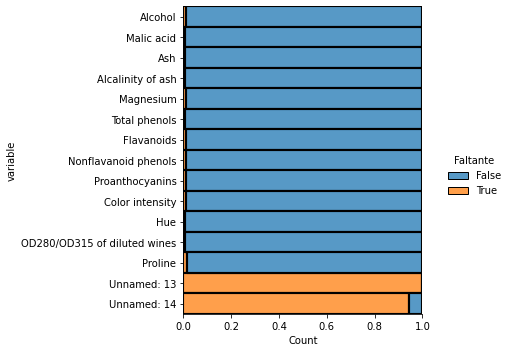

In [4]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="Faltante"),
    y="variable",
    hue="Faltante",
    multiple="fill",
    aspect=1.25
)

In [5]:
# Contamos los valores nulos de cada columna
df.isna().sum()

Alcohol                           2
Malic acid                        1
Ash                               1
Alcalinity of ash                 1
Magnesium                         2
Total phenols                     1
Flavanoids                        2
Nonflavanoid phenols              2
Proanthocyanins                   2
Color intensity                   2
Hue                               1
OD280/OD315 of diluted wines      1
Proline                           3
Unnamed: 13                     178
Unnamed: 14                     168
dtype: int64

In [6]:
# Eliminamos practicamente las filas que estan con valores nulos: Unnamed: 13 y Unnamed: 14.
del df['Unnamed: 13']
del df['Unnamed: 14']

In [7]:
# Remplazamos todos los valores nulos por 0 ya que son pocos los que existen y esto nos ayudara
# a poder realizar mas evaluaciones numericas en el futuro, además lo podemos hacer porque
# el dataframe es de tipo entero.
df = df.fillna(0)

In [8]:
#comprobamos que lo que hicimos se realizo.
df.isna().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

<Figure size 720x432 with 0 Axes>

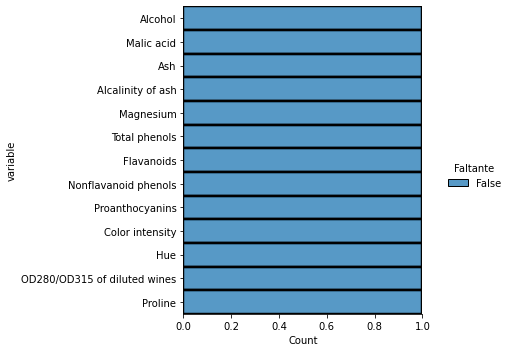

In [9]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="Faltante"),
    y="variable",
    hue="Faltante",
    multiple="fill",
    aspect=1.25
)

### 2- (5) Detecta los valores atípicos y elimínalos.

In [10]:
dfanterior = df
len(df.index)

178

In [11]:
# Se utiliza la distribución normal para buscar los valores atipios
# y ponemos el numero 3 como umbral, al principio teniamos 178 datos
# y ahora contamos con solo 163. Podriamos hacer la comprobación 
# visualizando un box plot.
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [12]:
len(df.index)

163

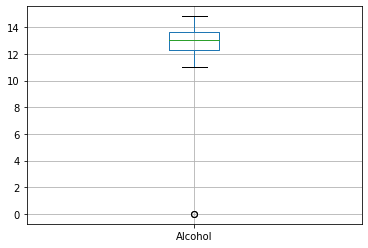

In [13]:
# Antes de borrar los valores atipicos
boxplot_alcoholAntes = dfanterior.boxplot(column=['Alcohol'])  

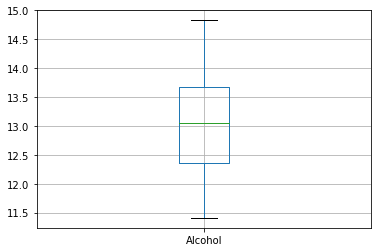

In [14]:
# Despues de eliminar los calores atipicos
boxplot_alcoholAhora = df.boxplot(column=['Alcohol'])  

### 3- (5) ¿Es necesario transformar columnas?, en caso que si, transforma las columnas y justifica el método utilizado.

En esta etapa yo no lo recomendaria ya que no conozo los rangos adecuados que tienen que tener los componentes de vino, pero seria necesario hacerlo para una interpretación mejor de los datos en un futuro y utilizar metodos binning como el binning para reducir la cantidad de datos por categoria.